In [38]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

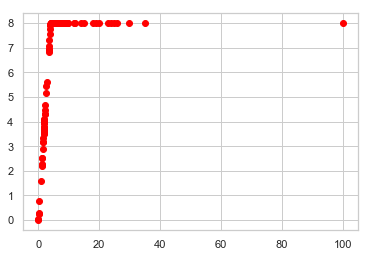

In [39]:
load_data = pd.read_csv("./battery-data.csv", header=None)
x = np.array(data[data.columns[0]]).reshape(data.shape[0], 1)
y = np.array(data[data.columns[1]]).reshape(data.shape[0], 1)
plt.scatter(x, y, color="red")

In [40]:
def get_median_filtered(signal, threshold=3):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

In [41]:
x_test = X[-30:]
x_train = X[:-30]

y_test = Y[-30:]
y_train = Y[:-30]

X = get_median_filtered(X)

Mean sqrt:  2.7500663273072936
Variance:  0.4196700939045951


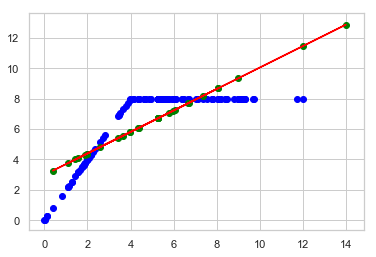

In [42]:
linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

print("Mean sqrt: ", mean_squared_error(y_test, y_pred))
print("Variance: ", r2_score(y_test, y_pred))

plt.scatter(X, Y, color='blue')
plt.scatter(x_test, y_pred, color='green')
plt.plot(x_test, y_pred, color='red')